In [1]:
import pandas as pd
df = pd.read_csv("../data/flight_data.csv")
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [2]:
print("Размер таблицы:", df.shape)
df.info()

Размер таблицы: (300153, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [3]:
df.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [4]:
df.drop(columns=["Unnamed: 0", "flight"], inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   source_city       300153 non-null  object 
 2   departure_time    300153 non-null  object 
 3   stops             300153 non-null  object 
 4   arrival_time      300153 non-null  object 
 5   destination_city  300153 non-null  object 
 6   class             300153 non-null  object 
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(7)
memory usage: 22.9+ MB


In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in df.select_dtypes(include ='object').columns:
    df[col] = le.fit_transform(df[col])

df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,2,2,2,5,5,1,2.17,1,5953
1,4,2,1,2,4,5,1,2.33,1,5953
2,0,2,1,2,1,5,1,2.17,1,5956
3,5,2,4,2,0,5,1,2.25,1,5955
4,5,2,4,2,4,5,1,2.33,1,5955


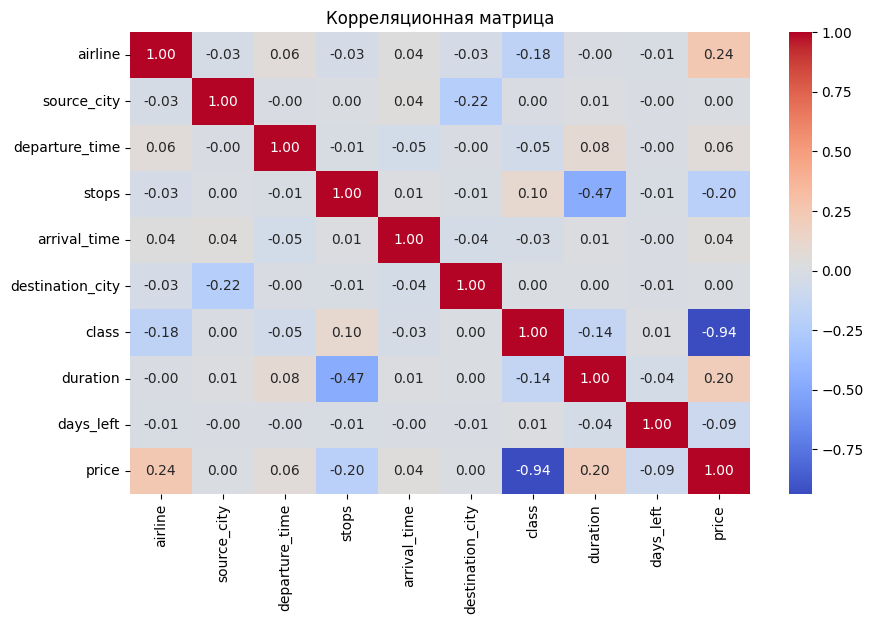

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))

sns.heatmap(df.corr(),
            annot=True,
            cmap="coolwarm",
            fmt=".2f")

plt.title("Корреляционная матрица")
plt.show()

In [8]:
from sklearn.model_selection import train_test_split


# X — таблица признаков (все колонки кроме 'price')
# y — целевая переменная (цена); drop('price', axis=1) — удаляет колонку с ценой, оставляя только признаки (X)

X = df.drop("price", axis=1)

y = df["price"]

# Делим на обучающую и тестовую выборку; test_size=0.2 — значит 20% данных пойдут в тест, 80% — в обучение
#random_state=42 — для воспроизводимости (чтобы разбиение всегда было одинаковым)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [9]:
# Посмотрим количество строк в обучающей и тестовой выборке

print("Размер X_train (признаки для обучения):", X_train.shape)
print("Размер X_test (признаки для теста):", X_test.shape)
print("Размер y_train (целевая переменная для обучения):", y_train.shape)
print("Размер y_test (целевая переменная для теста):", y_test.shape)


Размер X_train (признаки для обучения): (240122, 9)
Размер X_test (признаки для теста): (60031, 9)
Размер y_train (целевая переменная для обучения): (240122,)
Размер y_test (целевая переменная для теста): (60031,)


In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [11]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [12]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Средняя абсолютная ошибка (MAE):", mae)
print("Среднеквадратичная ошибка (MSE):", mse)
print("R2 score:", r2)

Средняя абсолютная ошибка (MAE): 1091.4435438794453
Среднеквадратичная ошибка (MSE): 7764563.913352611
R2 score: 0.9849372824023692


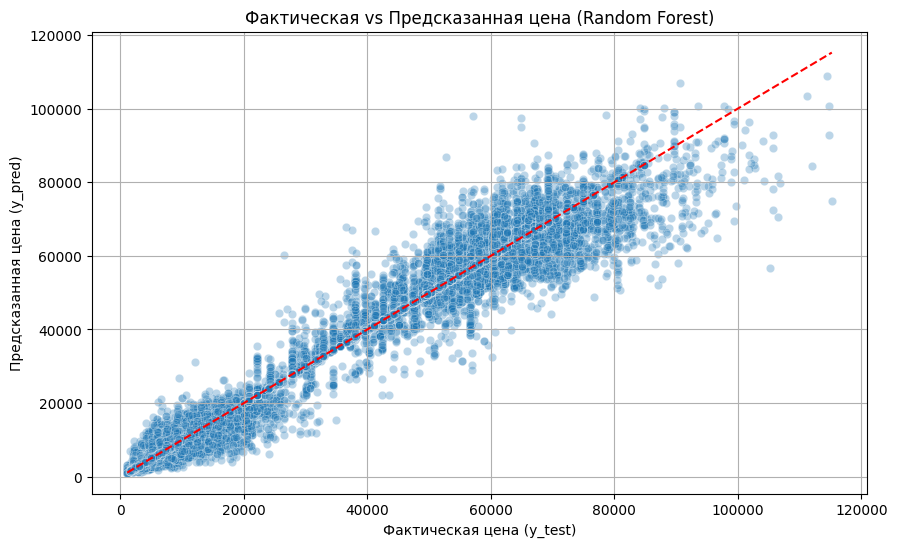

In [13]:
#также надо импортировать библиотки matplotlib.pyplot as plt; seaborn as sns(выше импортированны)

# Строим график: предсказания против настоящих значений
plt.figure(figsize=(10,6)) #задаем размер графика

# рисуем точки: x = настоящие значения, y = предсказанные
sns.scatterplot(x=y_test, y=y_pred, alpha=0.3) # точечный график, каждая точка - один рейс,альфа прозрачность

# рисуем диагональ - идеальные предсказания, где y_pred = y_test
plt.plot([y_test.min(),y_test.max()], [y_test.min(), y_test.max()], '--r') #рисует красную линию

plt.xlabel("Фактическая цена (y_test)") #подпись оси X
plt.ylabel("Предсказанная цена (y_pred)") #подпись оси Y
plt.title("Фактическая vs Предсказанная цена (Random Forest)") #заголовок
plt.grid(True) #включаем сетку
plt.show()

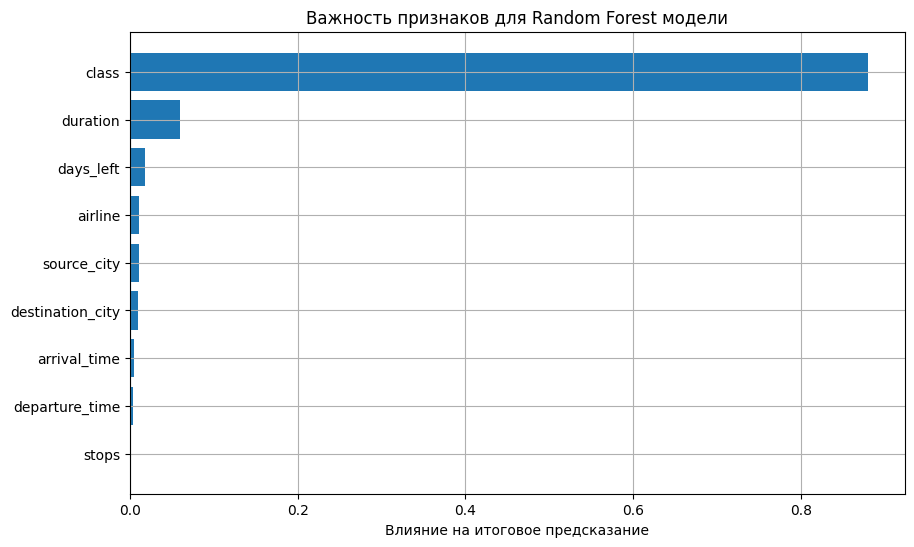

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Получаем важность признаков из модели
importances = model.feature_importances_

# Берем имена признаков (названия колонок)
feature_names = X_train.columns

# Создаем таблицу
importance_df = pd.DataFrame({'Признак': feature_names, 'Влияние': importances})

# Сортируем по убыванию влияния
importance_df = importance_df.sort_values(by='Влияние', ascending=False)

# Строим график
plt.figure(figsize=(10,6))
plt.barh(importance_df['Признак'], importance_df['Влияние']) #горизонтальные столбцы
plt.xlabel('Влияние на итоговое предсказание') # Подпись X
plt.title('Важность признаков для Random Forest модели') # Заголовок
plt.gca().invert_yaxis() # Чтобы самые важные признаки были сверху
plt.grid(True)
plt.show()

MAE: 2389.560791015625
MSE: 17131808.0
R2: 0.9667654633522034


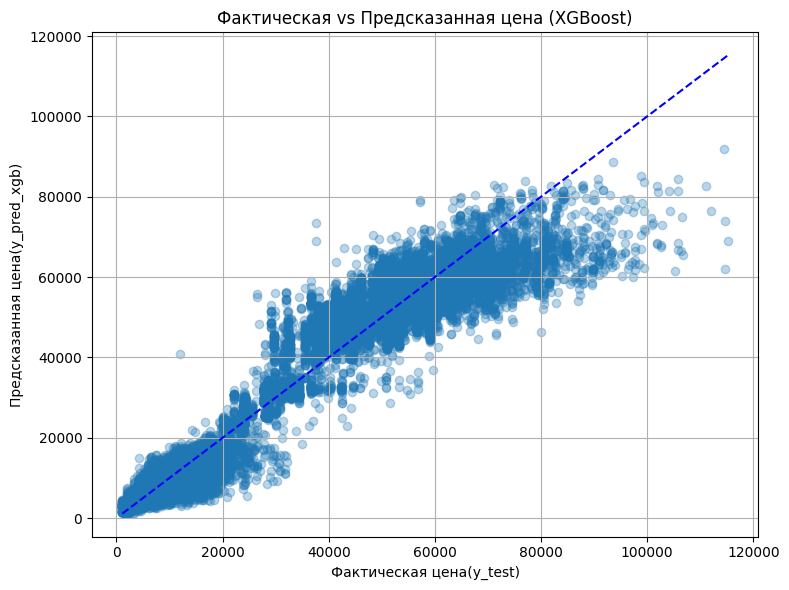

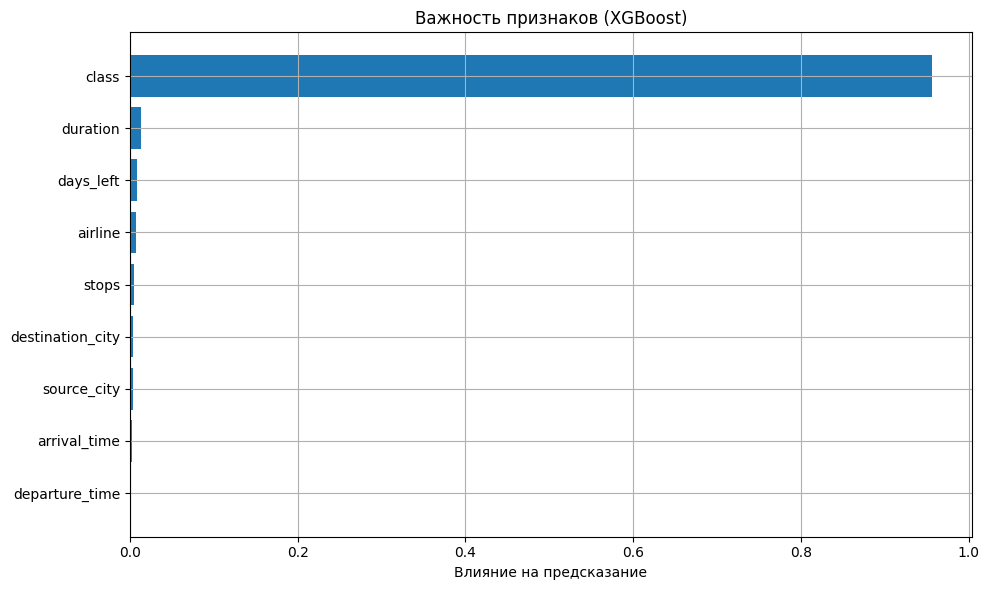

In [15]:
# импорт нужного
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd

# Создаем модель XGBoost
model_xgb = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)

# обучаем модель на данных
model_xgb.fit(X_train, y_train)

# Предсказываем цену на тестовых данных
y_pred_xgb = model_xgb.predict(X_test)

# Оцениваем качество модели метриками
mae = mean_absolute_error(y_test, y_pred_xgb)
mse = mean_squared_error(y_test, y_pred_xgb)
r2 = r2_score(y_test, y_pred_xgb)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R2: {r2}")

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_xgb, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--b')
plt.xlabel("Фактическая цена(y_test)")
plt.ylabel("Предсказанная цена(y_pred_xgb)")
plt.title("Фактическая vs Предсказанная цена (XGBoost)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Оцениваем важность признаков
importances = model_xgb.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({'Признак': feature_names,'Влияние': importances})
importance_df = importance_df.sort_values(by='Влияние', ascending=False)

# график важности
plt.figure(figsize=(10,6))
plt.barh(importance_df['Признак'], importance_df['Влияние'])
plt.xlabel('Влияние на предсказание')
plt.title('Важность признаков (XGBoost)')
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Базовая модель без обучения
xgb_base = XGBRegressor(random_state=42)

# Сетка параметров (все комбинации будут проверены)
param_grid = {
    'n_estimators': [50, 100, 200], #колличество деревьев
    'max_depth': [3, 6, 9], #глубина дерева
    'learning_rate': [0.01, 0.1, 0.3], #шаг обучения
    'subsample': [0.7, 1.0], #доля данных при обучении
    'colsample_bytree': [0.7, 1.0] #доля признаков для каждого дерева
}

# GridSearchCV (ищет лучшую комбинацию)
grid_search = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_grid,
    scoring='r2', #метрика, которую мы оптимизируем(качество предсказания)
    cv=3, #количество фолдов (частей данных)
    verbose=2, # подробный вывод в терминале
    n_jobs=-1 # использовать все ядра процессора
)

# Обучаем Grid Search (это может занять несколько минут ...)
grid_search.fit(X_train, y_train)

# Показываем улчшие параметры
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшие R2 score", grid_search.best_score_)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Лучшие параметры: {'colsample_bytree': 1.0, 'learning_rate': 0.3, 'max_depth': 9, 'n_estimators': 200, 'subsample': 1.0}
Лучшие R2 score 0.9862879912058512


MAE: 1286.180908203125
MSE: 6456672.0
R2: 0.9874745011329651


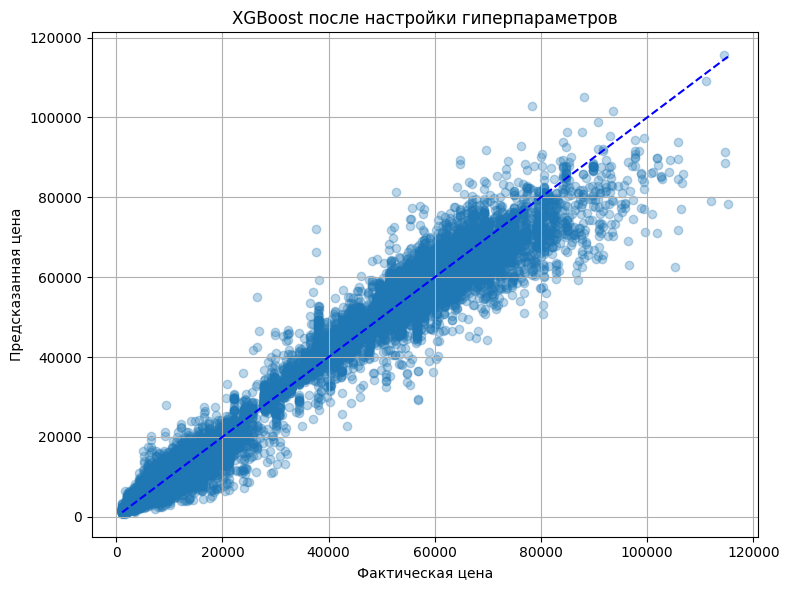

In [17]:
from xgboost import XGBRegressor

#Создаем модель с найденными параметрами
xgb_best = XGBRegressor(
    colsample_bytree=1.0,
    learning_rate=0.3,
    max_depth=9,
    n_estimators=200,
    subsample=1.0,
    random_state=42
)

# Обучаем на тренировочной выборке
xgb_best.fit(X_train, y_train)

# Делаем предсказания
y_pred_best = xgb_best.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred_best))
print("MSE:", mean_squared_error(y_test, y_pred_best))
print("R2:", r2_score(y_test, y_pred_best))

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_best, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--b')
plt.xlabel("Фактическая цена")
plt.ylabel("Предсказанная цена")
plt.title("XGBoost после настройки гиперпараметров")
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
import joblib # импортируем библиотеку для сериализации

# сохраняем обученную модель XGBoost после настройки
joblib.dump(xgb_best, "../model.pkl")

['../model.pkl']